It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression.

In [3]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset

### 1. Planar_utils



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [17]:
def sigmoid(z):
  s = 1 / (1 + np.exp(-z))
  return s


def load_planar_dataset():
  np.random.seed(1)
  m = 400  # number of examples
  N = int(m / 2)  # number of points per class
  D = 2  # dimensionality
  X = np.zeros((m, D))  # data matrix: (400, 2)
  Y = np.zeros((m, 1), dtype='uint8')  # labels: (400, 1)
  a = 4  # maximum ray of the flower

  for j in range(2):
    ix = range(N * j, N * (j + 1))
    t = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2  # theta
    r = a * np.sin(4 * t) + np.random.randn(N) * 0.2  # radius
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    Y[ix] = j

  X = X.T  # Shape: (2, 400)
  Y = Y.T  # Shape: (1, 400)
  return X, Y

def plot_decision_boundary(model, X, y):
  """
    Plot decision boundary for a given model.
    Arguments:
        model -- a function that takes X and returns predictions
        X -- input data, shape (2, m)
        y -- labels, shape (1, m)
  """
  x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
  y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
  h = 0.01
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)

def load_extra_datasets():
  """
    Load additional datasets.
    Returns:
        Dictionary of datasets
  """
  N = 200
  noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
  noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
  blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
  gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
  no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

  return {
        "noisy_circles": noisy_circles,
        "noisy_moons": noisy_moons,
        "blobs": blobs,
        "gaussian_quantiles": gaussian_quantiles,
        "no_structure": no_structure
    }

### 2. Get dataset
First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables X and Y.

In [18]:
X, Y = load_planar_dataset()
X.shape, Y.shape

((2, 400), (1, 400))

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

X shape: (2, 400)
Y shape: (1, 400)
Unique labels in Y: [0 1]
Number of class 0: 200
Number of class 1: 200


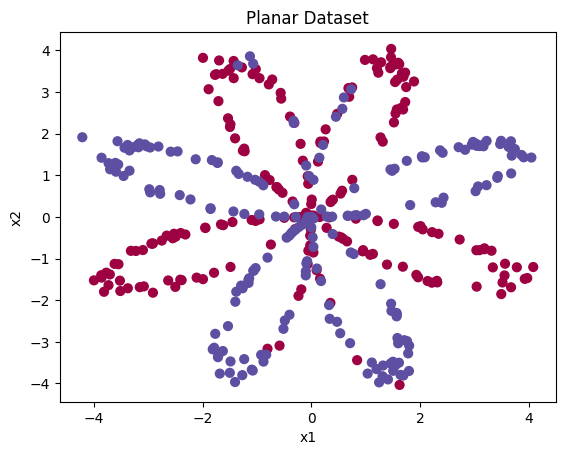

In [19]:
# Print shapes and label distribution
print("X shape:", X.shape)  # Expected: (2, 400)
print("Y shape:", Y.shape)  # Expected: (1, 400)
print("Unique labels in Y:", np.unique(Y))  # Expected: [0 1]
print("Number of class 0:", np.sum(Y == 0))  # Expected: ~200
print("Number of class 1:", np.sum(Y == 1))  # Expected: ~200

# Visualize the dataset
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Planar Dataset')
plt.show()

You have: - a `numpy-array (matrix) X` that contains your features `(x1, x2)` - a numpy-array (vector) Y that contains your labels `(red:0, blue:1)`.

Lets first get a better sense of what our data is like.

Exercise: How many training examples do you have? In addition, what is the shape of the variables `X and Y`?



In [21]:
shape_X = X.shape
shape_Y = Y.shape
m = (X.size)/shape_X[0]  # training set size
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


## 3 - Simple Logistic Regression
Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [22]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<ipython-input-23-df7c6bdb6ec1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


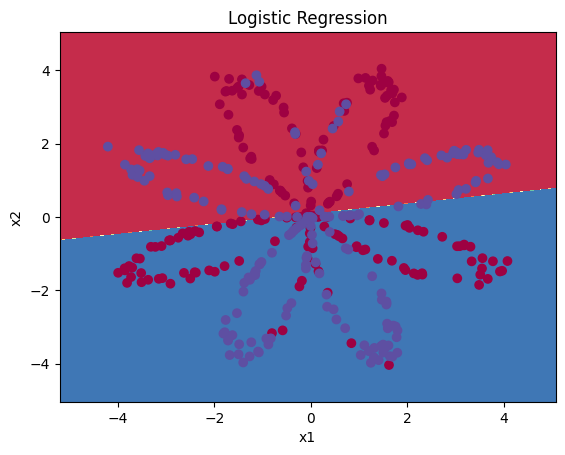

In [23]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation:** The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now!

## 4 - Neural Network model
- Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

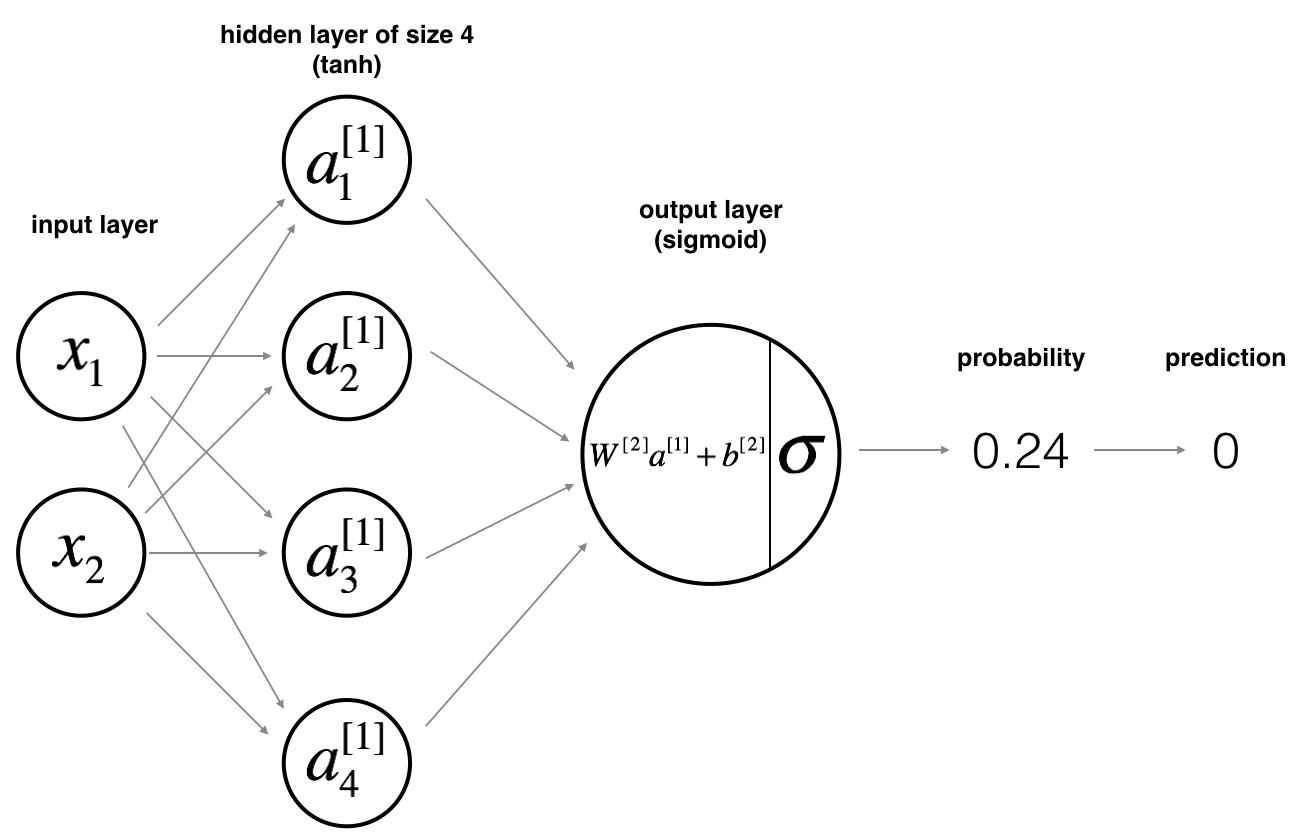

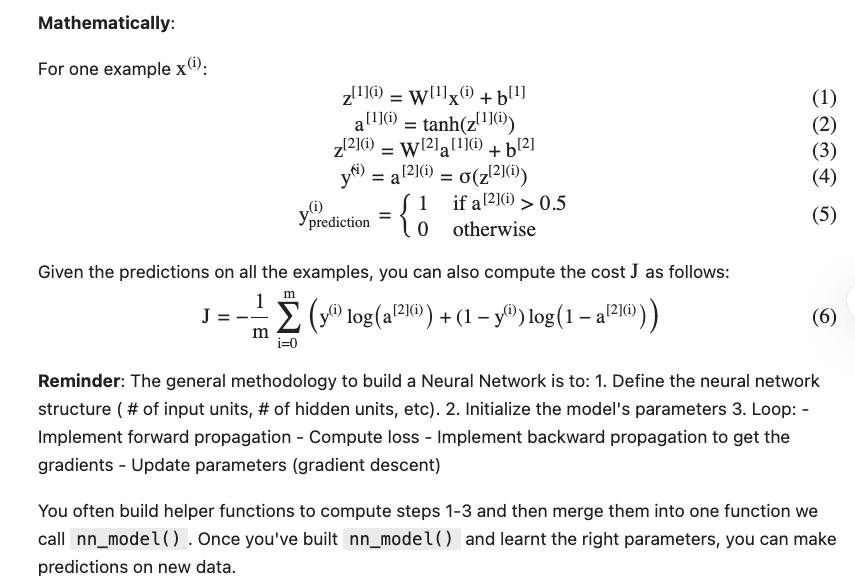

### 4.1 - Defining the neural network structure

**Exercise**: Define three variables: - n_x: the size of the input layer - n_h: the size of the hidden layer (set this to 4) - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [25]:
def layer_sizes(X, Y):
  """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
  """
  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]

  return (n_x, n_h, n_y)

In [29]:
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


**4.2 - Initialize the model's parameters**
**Exercise**: Implement the function `initialize_parameters()`.

**Instructions:**

- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
You will initialize the weights matrices with random values.

  - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros.
  - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [31]:
def initialize_parameters(n_x, n_h, n_y):
  """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
  """
  np.random.seed(2)

  W1 = np.random.randn(n_h,n_x) * 0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h) * 0.01
  b2 = np.zeros((n_y,1))

  assert (W1.shape == (n_h, n_x))
  assert (b1.shape == (n_h, 1))
  assert (W2.shape == (n_y, n_h))
  assert (b2.shape == (n_y, 1))

  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}

  return parameters

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### 4.3 - The Loop

Question: `Implement forward_propagation().`

Instructions:

- Look above at the mathematical representation of your classifier.
- You can use the function sigmoid(). It is built-in (imported) in the notebook.
- You can use the function np.tanh(). It is part of the numpy library.
- The steps you have to implement are:


1. Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters()) by using parameters[".."].
2. Implement Forward Propagation. Compute Z[1],A[1],Z[2] and A[2]
 (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.

In [32]:
def forward_propagation(X, parameters):
  """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
  """
  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]


  # Implement Forward Propagation to calculate A2 (probabilities)
  Z1 = np.dot(W1,X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)

  assert(A2.shape == (1, X.shape[1]))

  # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
  cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}

  return A2, cache

In [34]:
A2, cache = forward_propagation(X, parameters)

A2.shape

(1, 400)

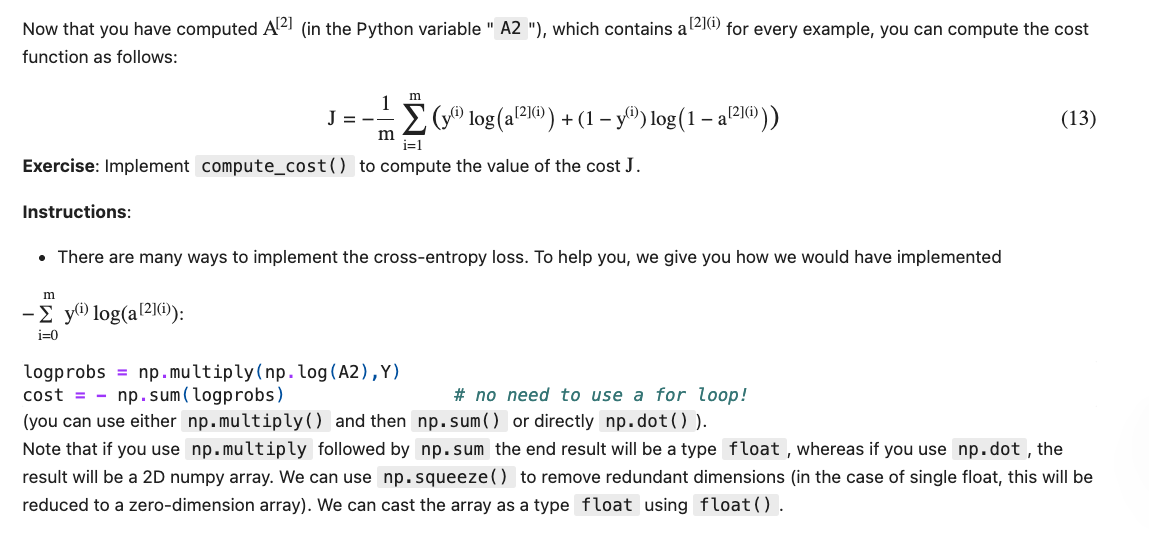

In [35]:
def compute_cost(A2, Y, parameters):
  """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function,
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]

    Returns:
    cost -- cross-entropy cost given equation (13)

  """

  m = Y.shape[1] # number of example

  # Compute the cross-entropy cost

  logprobs = logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
  cost = (-1/m) * np.sum(logprobs)


  cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17
  assert(isinstance(cost, float))

  return cost

In [36]:
print("cost = " + str(compute_cost(A2, Y, parameters)))

cost = 0.6930480201239823


Using the cache computed during forward propagation, you can now implement backward propagation.

`Question: Implement the function backward_propagation().`

**Instructions**: Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.

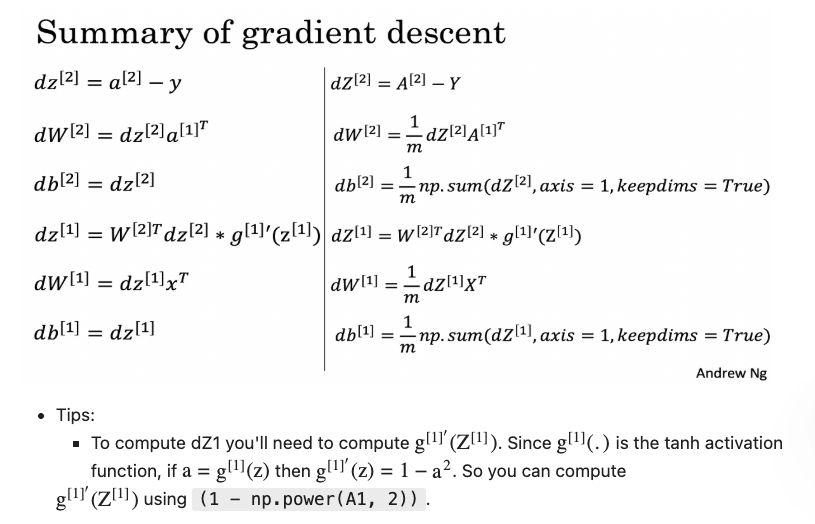

In [37]:
def backward_propagation(parameters, cache, X, Y):
  """
    Implement the backward propagation using the instructions above.

    Arguments:
      parameters -- python dictionary containing our parameters
      cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
      X -- input data of shape (2, number of examples)
      Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
  m = X.shape[1]

  # First, retrieve W1 and W2 from the dictionary "parameters".

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]


  # Retrieve also A1 and A2 from dictionary "cache".

  A1 = cache["A1"]
  A2 = cache["A2"]
  Z1 = cache["Z1"]
  Z2 = cache["Z2"]


  # Backward propagation: calculate dW1, db1, dW2, db2.

  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
  dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
  dW1 = (1/m) *(np.dot(dZ1,X.T))
  db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))


  grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}

  return grads

In [38]:
grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00023606 -0.00207914]
 [ 0.0002091  -0.00178201]
 [-0.00012051  0.0010843 ]
 [-0.00051496  0.00449162]]
db1 = [[ 1.06848030e-07]
 [-9.70907252e-07]
 [-7.20012658e-08]
 [ 3.03048452e-07]]
dW2 = [[-1.75478714e-05  3.70240274e-03 -1.25686736e-03 -2.55725650e-03]]
db2 = [[-1.0892314e-05]]


**Question**: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

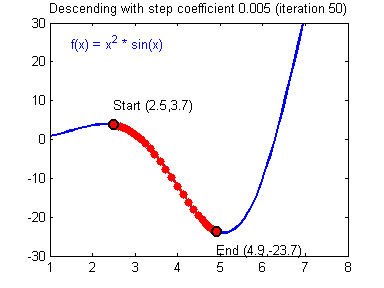


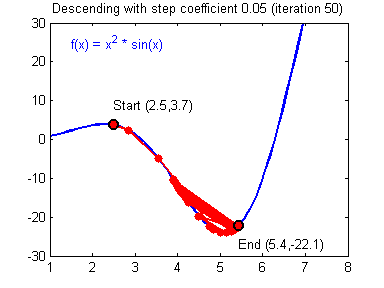
Illustration: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

In [39]:
def update_parameters(parameters, grads, learning_rate):
  """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
  """

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}

  return parameters

In [40]:
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00445085  0.0019323 ]
 [-0.02161288  0.01854112]
 [-0.01778975 -0.00971864]
 [ 0.00564676 -0.01784282]]
b1 = [[-1.28217636e-07]
 [ 1.16508870e-06]
 [ 8.64015190e-08]
 [-3.63658142e-07]]
W2 = [[-0.01055846 -0.01353296  0.00702278  0.02599079]]
b2 = [[1.30707768e-05]]


### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model()

In [41]:
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
  n_x = layer_sizes(X, Y)[0]
  n_y = layer_sizes(X, Y)[2]

  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # Loop (gradient descent)
  for i in range(0, num_iterations):
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
    A2, cache = forward_propagation(X, parameters)
    # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
    cost = compute_cost(A2, Y, parameters)
    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
    grads = backward_propagation(parameters, cache, X, Y)
    # Update rule for each parameter
    parameters = update_parameters(parameters, grads, learning_rate)
    # If print_cost=True, Print the cost every 1000 iterations
    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters

parameters = nn_model(X, Y, 4, 1.02,num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))



Cost after iteration 0: 0.693048
W1 = [[-0.00440836  0.00155805]
 [-0.02157524  0.01822035]
 [-0.01781144 -0.00952346]
 [ 0.00555407 -0.01703433]]
b1 = [[-1.08984991e-07]
 [ 9.90325397e-07]
 [ 7.34412911e-08]
 [-3.09109421e-07]]
W2 = [[-0.01056162 -0.01286653  0.00679655  0.02553048]]
b2 = [[1.11101603e-05]]


###4.5 Predictions

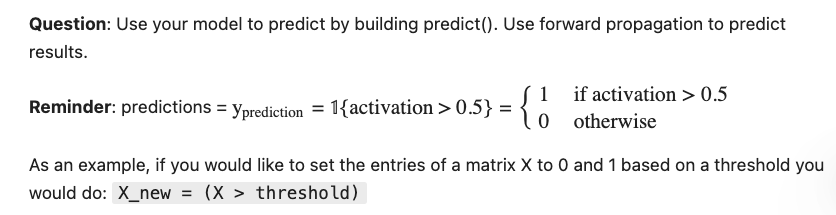

In [42]:
def predict(parameters, X):
  """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
  """
  # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
  A2, cache = forward_propagation(X, parameters)
  predictions = (A2 > 0.5)

  return predictions

predictions = predict(parameters, X)
print("predictions mean = " + str(np.mean(predictions)))


predictions mean = 0.48


It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of nh
 hidden units.

Cost after iteration 0: 0.693048


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

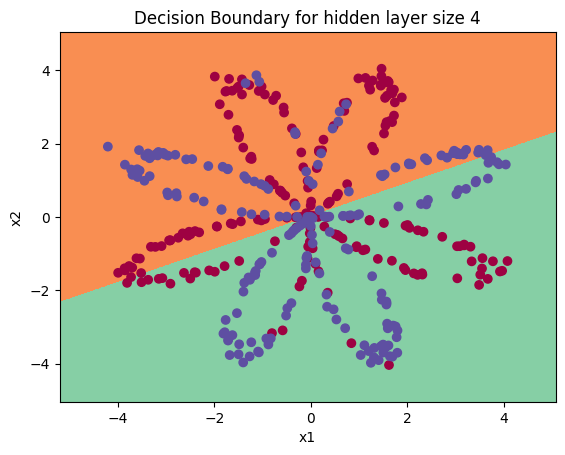

In [43]:
parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [45]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 57%


<ipython-input-45-d1694606b71e>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
